In [1]:
# 한글 폰트 설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

%config lnlineBackend.figure_format = 'retina'
!apt -qq -y install fonts-nanum


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 45 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (8,085 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 121918 files and dire

Text(0.5, 1.0, '한글')

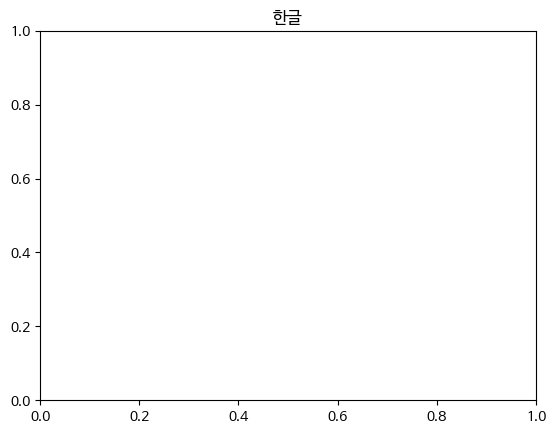

In [1]:
## 런타임 - 세션 다시시작

## 런타임 다시 시작 후 진행
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

# 확인
plt.title('한글')

In [2]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_excel('/content/drive/MyDrive/데이터마이닝/DATA/건강검진정보_학습데이터.xlsx')
df

,성별,신장,체중,허리둘레,수축기혈압,이완기혈압,식전혈당,트리글리세라이드,콜레스테롤,높은혈압,높은혈당,높은중성지방,낮은콜레스테롤,복부비만,BMI,대사증후군수,대사증후군판별,비만도판별
0,남,170,70,82.0,124,80,83,95,57,0,0,0,0,0,24.22,0,정상,정상
1,여,135,40,81.0,118,63,112,168,42,0,1,1,1,0,21.95,3,위험군,정상
2,여,145,50,78.0,148,67,98,70,57,1,0,0,0,0,23.78,1,주의군,정상
3,여,150,65,83.0,118,68,111,106,66,0,1,0,0,0,28.89,1,주의군,과체중
4,여,155,55,74.0,110,77,98,193,35,0,0,1,1,0,22.89,2,주의군,정상
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
439,여,150,50,69.0,100,64,93,307,37,0,0,1,1,0,22.22,2,주의군,정상
440,여,155,50,78.0,124,70,120,85,62,0,1,0,0,0,20.81,1,주의군,정상
441,여,155,55,77.0,100,71,88,56,71,0,0,0,0,0,22.89,0,정상,정상
442,남,160,60,80.2,150,90,104,88,71,1,1,0,0,0,23.44,2,주의군,정상


In [4]:
df.columns

Index(['성별', '신장', '체중', '허리둘레', '수축기혈압', '이완기혈압', '식전혈당', '트리글리세라이드', '콜레스테롤',
       '높은혈압', '높은혈당', '높은중성지방', '낮은콜레스테롤', '복부비만', 'BMI', '대사증후군수', '대사증후군판별',
       '비만도판별'],
      dtype='object')

In [5]:
#필요한 열 추출
df = df[['성별', '신장', '체중', '허리둘레', '수축기혈압', '이완기혈압', '식전혈당', '트리글리세라이드', '콜레스테롤','BMI', '대사증후군판별',
       '비만도판별']]
df.head()

,성별,신장,체중,허리둘레,수축기혈압,이완기혈압,식전혈당,트리글리세라이드,콜레스테롤,BMI,대사증후군판별,비만도판별
0,남,170,70,82.0,124,80,83,95,57,24.22,정상,정상
1,여,135,40,81.0,118,63,112,168,42,21.95,위험군,정상
2,여,145,50,78.0,148,67,98,70,57,23.78,주의군,정상
3,여,150,65,83.0,118,68,111,106,66,28.89,주의군,과체중
4,여,155,55,74.0,110,77,98,193,35,22.89,주의군,정상


In [6]:
# 데이터 변환 : 타겟 (대사증후군판별 예측), 범주형 데이터를 수치형 데이터로

# scikit-learn 라이브러리
from sklearn.preprocessing import LabelEncoder

# 데이터 변환한 데이터를 저장하기 위한 데이터프레임 생성
dft = df.copy()

# OrdinalEncoder 객체 생성
label_encoder = LabelEncoder()

# fit_transform 중요
dft['대사증후군판별'] = label_encoder.fit_transform(dft['대사증후군판별'])
dft['비만도판별'] = label_encoder.fit_transform(dft['비만도판별'])

dft.head()

,성별,신장,체중,허리둘레,수축기혈압,이완기혈압,식전혈당,트리글리세라이드,콜레스테롤,BMI,대사증후군판별,비만도판별
0,남,170,70,82.0,124,80,83,95,57,24.22,1,3
1,여,135,40,81.0,118,63,112,168,42,21.95,0,3
2,여,145,50,78.0,148,67,98,70,57,23.78,2,3
3,여,150,65,83.0,118,68,111,106,66,28.89,2,0
4,여,155,55,74.0,110,77,98,193,35,22.89,2,3


In [7]:
# scikit-learn 라이브러리
from sklearn.preprocessing import OneHotEncoder

# OneHotEncoder 객체 생성
onehot_encoder = OneHotEncoder(sparse=False)

# OrdinalEncoder 객체 생성
onehot_data = onehot_encoder.fit_transform(dft[['성별']])

# 원핫 인코딩된 데이터를 데이터프레임으로 변환
onehot_df = pd.DataFrame(onehot_data, columns = onehot_encoder.categories_[0].tolist())
onehot_df = onehot_df.astype('int')

dft = pd.concat([dft, onehot_df], axis = 1)
dft

,성별,신장,체중,허리둘레,수축기혈압,이완기혈압,식전혈당,트리글리세라이드,콜레스테롤,BMI,대사증후군판별,비만도판별,남,여
0,남,170,70,82.0,124,80,83,95,57,24.22,1,3,1,0
1,여,135,40,81.0,118,63,112,168,42,21.95,0,3,0,1
2,여,145,50,78.0,148,67,98,70,57,23.78,2,3,0,1
3,여,150,65,83.0,118,68,111,106,66,28.89,2,0,0,1
4,여,155,55,74.0,110,77,98,193,35,22.89,2,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
439,여,150,50,69.0,100,64,93,307,37,22.22,2,3,0,1
440,여,155,50,78.0,124,70,120,85,62,20.81,2,3,0,1
441,여,155,55,77.0,100,71,88,56,71,22.89,1,3,0,1
442,남,160,60,80.2,150,90,104,88,71,23.44,2,3,1,0


In [8]:
# test셋과 train셋을 나누기
from sklearn.model_selection import train_test_split
feature = dft.loc[:, ['신장', '체중']]
target = dft['대사증후군판별']
# stratify = target 옵션 : 타겟데이터를 나눌 때, 대사증후군 비율대로 테스트 및 트레인 데이터 나눌 때 적용
X_train, X_test, y_train, y_test = train_test_split(feature, target, shuffle=True, stratify = target, random_state=156) #난수시드 42, 123 등을 주로 사용

# 의사결정 모델

In [9]:
# 모델
from sklearn.tree import DecisionTreeClassifier

# 평가지표
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score, confusion_matrix

# 학습 및 예측
dt = DecisionTreeClassifier(random_state=156)
dt.fit(X_train, y_train)
pred = dt.predict(X_test)

# 평가하기
accuracy_score(y_test, pred)

0.5135135135135135

In [11]:
feature = dft.loc[:,['남','여','신장','체중']]
target = dft['대사증후군판별']
X_train, X_test, y_train, y_test = train_test_split(feature, target, shuffle=True, stratify = target, random_state=156)

# 학습 및 예측 (의사결정 모델)
dt =  DecisionTreeClassifier(random_state=156)
dt.fit(X_train, y_train)
pred = dt.predict(X_test)

# 평가하기 (이정도는 코딩할 줄 알아야 함)
accuracy_score(y_test, pred)

0.5585585585585585

In [12]:
df.columns

Index(['성별', '신장', '체중', '허리둘레', '수축기혈압', '이완기혈압', '식전혈당', '트리글리세라이드', '콜레스테롤',
       'BMI', '대사증후군판별', '비만도판별'],
      dtype='object')

In [14]:
# 신장, 체중 제외한 다른 변수와의 비교
#feature 가 양이 많아지면 r스퀘어값이 커지게 된다
feature = dft.loc[:,['허리둘레', '수축기혈압', '이완기혈압', '식전혈당', '트리글리세라이드', '콜레스테롤']]


target = dft['대사증후군판별']
X_train, X_test, y_train, y_test = train_test_split(feature, target, shuffle=True, stratify = target, random_state=156)

# 학습 및 예측 (의사결정 모델)
dt =  DecisionTreeClassifier(random_state=156)
dt.fit(X_train, y_train)
pred = dt.predict(X_test)

# 평가하기
accuracy_score(y_test, pred)

0.8198198198198198

In [15]:
# 남, 여 추가
feature = dft.loc[:,['남','여','허리둘레', '수축기혈압', '이완기혈압', '식전혈당', '트리글리세라이드', '콜레스테롤']]


target = dft['대사증후군판별']
X_train, X_test, y_train, y_test = train_test_split(feature, target, shuffle=True, stratify = target, random_state=156)

# 학습 및 예측 (의사결정 모델)
dt =  DecisionTreeClassifier(random_state=156)
dt.fit(X_train, y_train)
pred = dt.predict(X_test)

# 평가하기
accuracy_score(y_test, pred)

0.8378378378378378

In [16]:
from sklearn.tree import export_graphviz
import graphviz

# .dot 파일로 export
export_graphviz(dt, out_file = 'tree.dot', impurity=True, filled=True)

# 생성된 tree.dot 파일을 읽어서 시각화
with open('tree.dot') as fp:
  dot_graph = fp.read()

graphviz.Source(dot_graph)

# 생성된 .dot 파일을  .png로 변환
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'decision-tree.png', '-Gdpi=600'])

from IPython.display import Image
Image(filename = 'decision-tree.png')

Output hidden; open in https://colab.research.google.com to view.

In [17]:
# 오차행렬 구하기
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score, confusion_matrix
from sklearn.metrics import classification_report

# 평가지표 함수
def get_clf_eval(y_test, pred):
  accuracy = accuracy_score(y_test, pred)
  precision = precision_score(y_test, pred, average='macro')
  recall = recall_score(y_test, pred, average='macro')
  f1 = f1_score(y_test, pred, average='macro')

  print(f'정확도: {accuracy: .4f}, 정밀도: {precision: .4f}, 재현율: {recall: .4f}, F1: {f1:.4f}')

In [18]:
get_clf_eval(y_test, pred)

정확도:  0.8378, 정밀도:  0.8433, 재현율:  0.8181, F1: 0.8294


정확도, 정밀도, 재현율 나오는 방법 / 어떻게 이것을 적용할지 (강의노트)

---

정확도를 적용시켜야 할 때

---

정밀도를 적용시켜야 할 때

---
F1를 적용시켜야 할 때


In [19]:
# 리포팅
from sklearn.metrics import classification_report

print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.79      0.70      0.75        27
           1       0.90      0.86      0.88        22
           2       0.83      0.89      0.86        62

    accuracy                           0.84       111
   macro avg       0.84      0.82      0.83       111
weighted avg       0.84      0.84      0.84       111



In [21]:
# 여러 가지 분류 모델을 한꺼번에 수행
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [23]:
# 오차행렬 구하기
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score, confusion_matrix
from sklearn.metrics import classification_report

# 평가지표 함수
def get_clf_eval(y_test, pred):
  accuracy = accuracy_score(y_test, pred)
  precision = precision_score(y_test, pred, average='macro')
  recall = recall_score(y_test, pred, average='macro')
  f1 = f1_score(y_test, pred, average='macro')

  print(f'정확도: {accuracy: .4f}, 정밀도: {precision: .4f}, 재현율: {recall: .4f}, F1: {f1:.4f}')
  return (accuracy, precision, recall, f1) #튜플로 반환

In [24]:
# 학습, 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(feature, target, shuffle=True, stratify = target, random_state=156)

In [36]:
model_dic = {
    "Nearest Neighbors" : KNeighborsClassifier(3),
    "SVM" : SVC(),
    "Linear SVM" : SVC(kernel='linear', C=0.025),
    "RBF SVM" : SVC(gamma=2, C=1),
    "Decision Tree" : DecisionTreeClassifier(),
    "Random Forest" : RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    "LogisticRegression" : LogisticRegression(),
    "Adaboost" : AdaBoostClassifier(),
    "Naive Bayes" : GaussianNB(),
    "QDA" : QuadraticDiscriminantAnalysis()
}

In [37]:
model_p = {}
model_acc = {}

for key in model_dic.keys() :
  model = model_dic[key]
  print(f'{key} : training')
  model.fit(X_train, y_train)

  print(f'{key} : predict')
  model_p[key] = model.predict(X_test)
  model_acc[key] = get_clf_eval(y_test, model_p[key])

Nearest Neighbors : training
Nearest Neighbors : predict
정확도:  0.7568, 정밀도:  0.7461, 재현율:  0.7586, F1: 0.7438
SVM : training
SVM : predict
정확도:  0.7928, 정밀도:  0.8414, 재현율:  0.7243, F1: 0.7636
Linear SVM : training
Linear SVM : predict
정확도:  0.8378, 정밀도:  0.8701, 재현율:  0.7972, F1: 0.8189
RBF SVM : training
RBF SVM : predict
정확도:  0.5586, 정밀도:  0.1862, 재현율:  0.3333, F1: 0.2389
Decision Tree : training
Decision Tree : predict
정확도:  0.8198, 정밀도:  0.8327, 재현율:  0.7935, F1: 0.8103
Random Forest : training
Random Forest : predict
정확도:  0.8108, 정밀도:  0.8362, 재현율:  0.7672, F1: 0.7905
LogisticRegression : training
LogisticRegression : predict
정확도:  0.7387, 정밀도:  0.7608, 재현율:  0.6781, F1: 0.7024
Adaboost : training
Adaboost : predict
정확도:  0.7658, 정밀도:  0.7534, 재현율:  0.7793, F1: 0.7638
Naive Bayes : training
Naive Bayes : predict
정확도:  0.7568, 정밀도:  0.7817, 재현율:  0.7223, F1: 0.7333
QDA : training
QDA : predict
정확도:  0.4144, 정밀도:  0.4642, 재현율:  0.5069, F1: 0.4231


In [38]:
# 튜플 형태
model_acc

{'Nearest Neighbors': (0.7567567567567568,
  0.7461483934067314,
  0.7586256833568662,
  0.7438227323449705),
 'SVM': (0.7927927927927928,
  0.8413600288600289,
  0.7242858694471598,
  0.7635575749926374),
 'Linear SVM': (0.8378378378378378,
  0.8701227965933848,
  0.7972376090655661,
  0.8188602442333787),
 'RBF SVM': (0.5585585585585585,
  0.18618618618618618,
  0.3333333333333333,
  0.23892100192678223),
 'Decision Tree': (0.8198198198198198,
  0.8326513213981244,
  0.7934542558198472,
  0.8103052503052504),
 'Random Forest': (0.8108108108108109,
  0.8361998985286657,
  0.7671699069548531,
  0.7904761904761904),
 'LogisticRegression': (0.7387387387387387,
  0.7608333333333333,
  0.6780891350783823,
  0.7024193483198745),
 'Adaboost': (0.7657657657657657,
  0.753429089026915,
  0.7792983599435214,
  0.7638418079096047),
 'Naive Bayes': (0.7567567567567568,
  0.781656447417317,
  0.722330835234061,
  0.7333002939029923),
 'QDA': (0.4144144144144144,
  0.4641975308641975,
  0.506896926

In [39]:
# 데이터프레임으로 변환
model_acc = pd.DataFrame.from_dict(model_acc,orient='index',columns= ['accuracy','precision','recall','f1'])

model_acc.sort_values('accuracy', ascending=False)

,accuracy,precision,recall,f1
Linear SVM,0.837838,0.870123,0.797238,0.818860
Decision Tree,0.819820,0.832651,0.793454,0.810305
Random Forest,0.810811,0.836200,0.767170,0.790476
SVM,0.792793,0.841360,0.724286,0.763558
Adaboost,0.765766,0.753429,0.779298,0.763842
Nearest Neighbors,0.756757,0.746148,0.758626,0.743823
Naive Bayes,0.756757,0.781656,0.722331,0.733300
LogisticRegression,0.738739,0.760833,0.678089,0.702419
RBF SVM,0.558559,0.186186,0.333333,0.238921
QDA,0.414414,0.464198,0.506897,0.423054
